In [45]:
import pandas as pd
import seaborn as sns
import zipfile


# open the csv file in the dataset

# change the path before execute
with open("/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/PregnancyData.csv") as f:
 # read the dataset
  df = pd.read_csv(f, low_memory=False)

In [46]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


<AxesSubplot:>

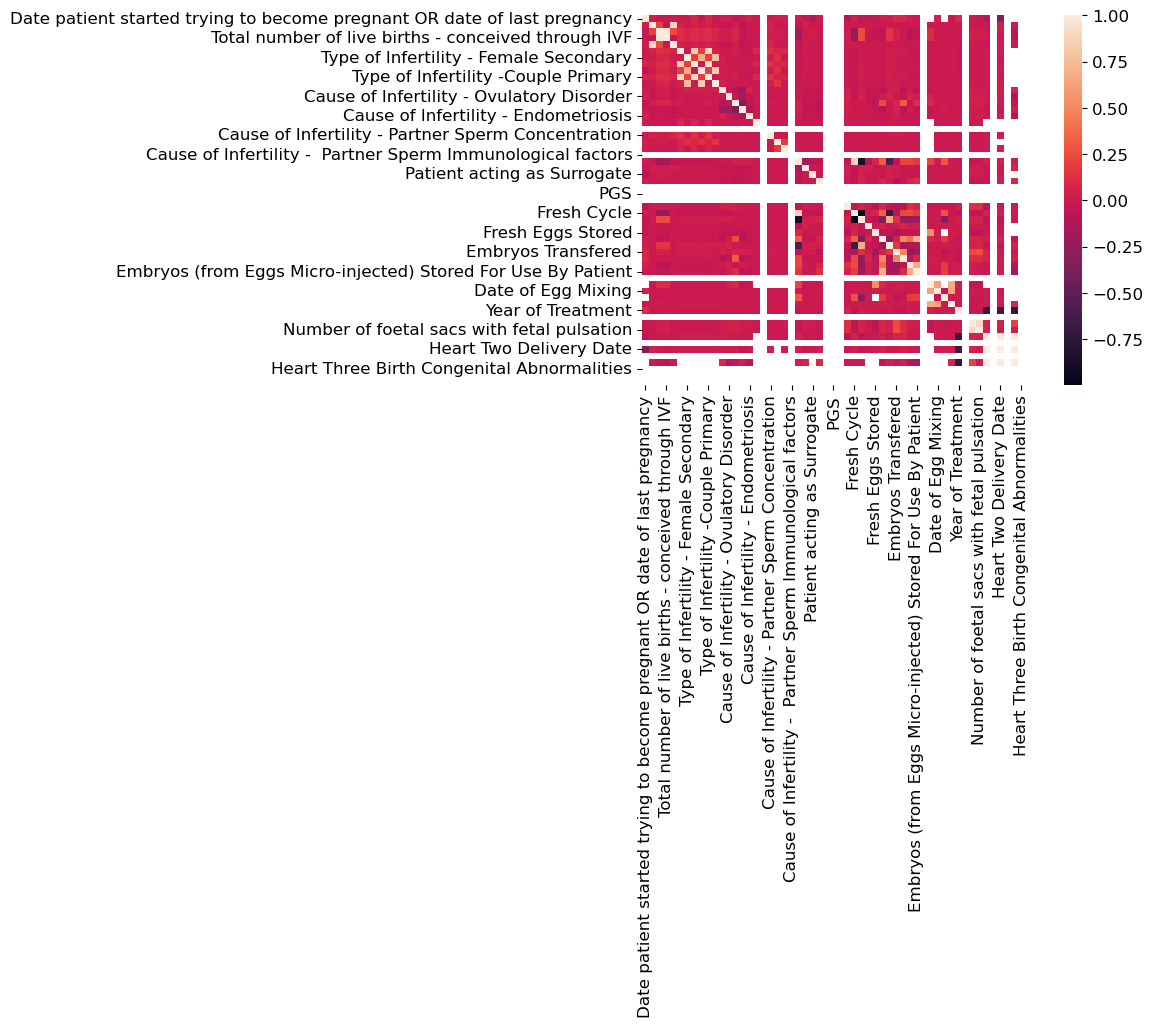

In [47]:
sns.heatmap(df.corr())

In [48]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

print('Number of columns :', len(col_mod))
print(mod_df.columns)

Number of columns : 95
Number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovul

In [49]:
mod_df['Embryos Transfered'] = df['Embryos Transfered']

/tmp/ipykernel_21419/4167085505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['Embryos Transfered'] = df['Embryos Transfered']


In [50]:
mod_df['Embryos Transfered']

0         1.0
1         2.0
2         0.0
3         1.0
4         2.0
         ... 
158514    NaN
158515    NaN
158516    NaN
158517    NaN
158518    NaN
Name: Embryos Transfered, Length: 158519, dtype: float64

In [51]:
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [52]:
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)


/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [54]:
print(mod_df.nunique())

Patient Age at Treatment                               7
Total Number of Previous IVF cycles                    7
Total number of IVF pregnancies                        7
Total number of live births - conceived through IVF    6
Type of Infertility - Female Primary                   2
Type of Infertility - Female Secondary                 2
Type of Infertility - Male Primary                     2
Type of Infertility - Male Secondary                   2
Type of Infertility -Couple Primary                    2
Type of Infertility -Couple Secondary                  2
Cause  of Infertility - Tubal disease                  2
Cause of Infertility - Ovulatory Disorder              2
Cause of Infertility - Male Factor                     2
Cause of Infertility - Patient Unexplained             2
Cause of Infertility - Endometriosis                   2
Cause of Infertility - Cervical factors                2
Cause of Infertility -  Partner Sperm Morphology       2
Stimulation used               

In [55]:
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
['0' '1' '2' '4' '3' '5' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number of foet

In [56]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df.fillna(value=mod_df['Embryos Transfered'].mean(), inplace=True)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39']
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Tran

In [58]:
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)

In [59]:
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [60]:
mod_df.describe()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Partner Sperm Morphology,Stimulation used,Number of Live Births,Number of foetal sacs with fetal pulsation,Embryos Transfered
count,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,...,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000,156025.000000
mean,33.408425,1.215715,0.181612,0.128326,0.003551,0.001448,0.003314,0.001455,0.003769,0.001032,...,0.114501,0.338068,0.274578,0.055651,0.000026,0.000071,0.661445,0.273104,0.316257,1.164258
std,6.776003,1.543060,0.449494,0.357857,0.059482,0.038032,0.057468,0.038115,0.061274,0.032107,...,0.318420,0.473053,0.446303,0.229248,0.005063,0.008396,0.473220,0.507720,0.539905,0.733836
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,47.500000,6.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000


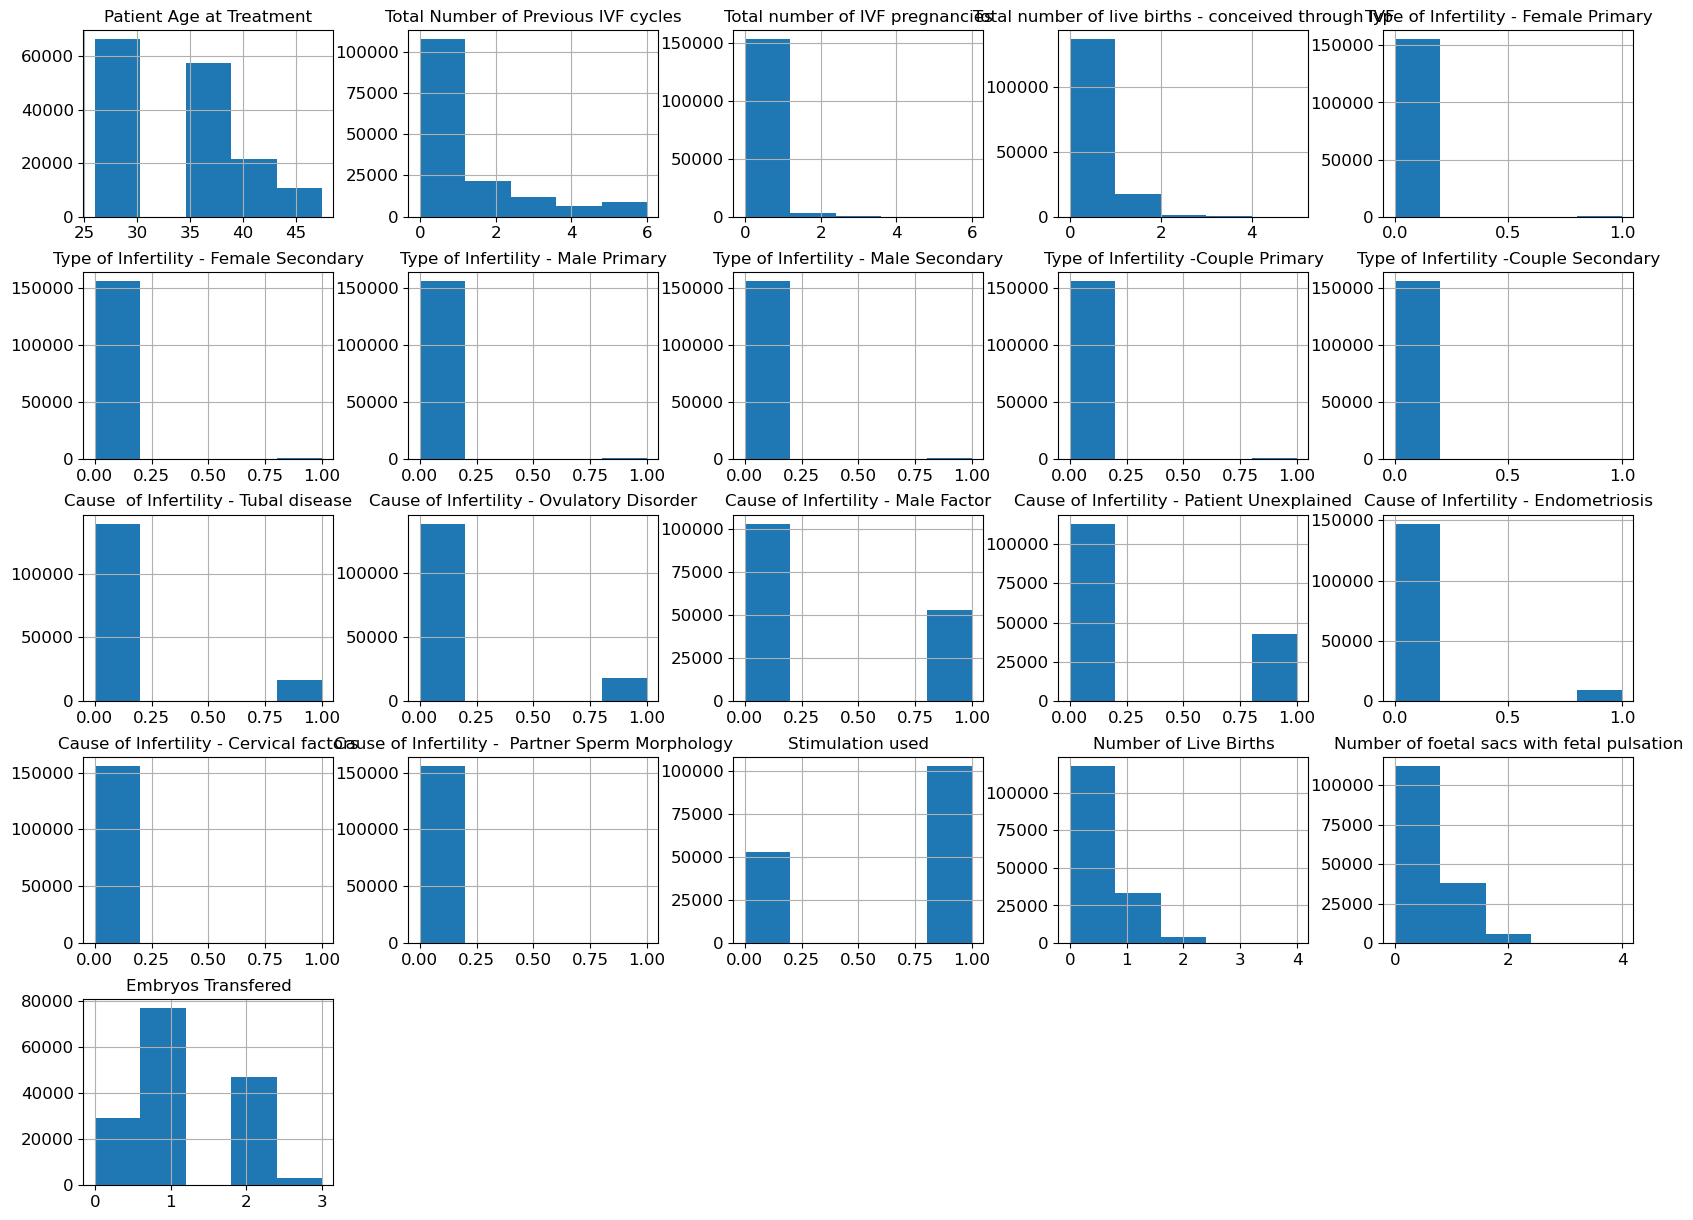

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

<AxesSubplot:>

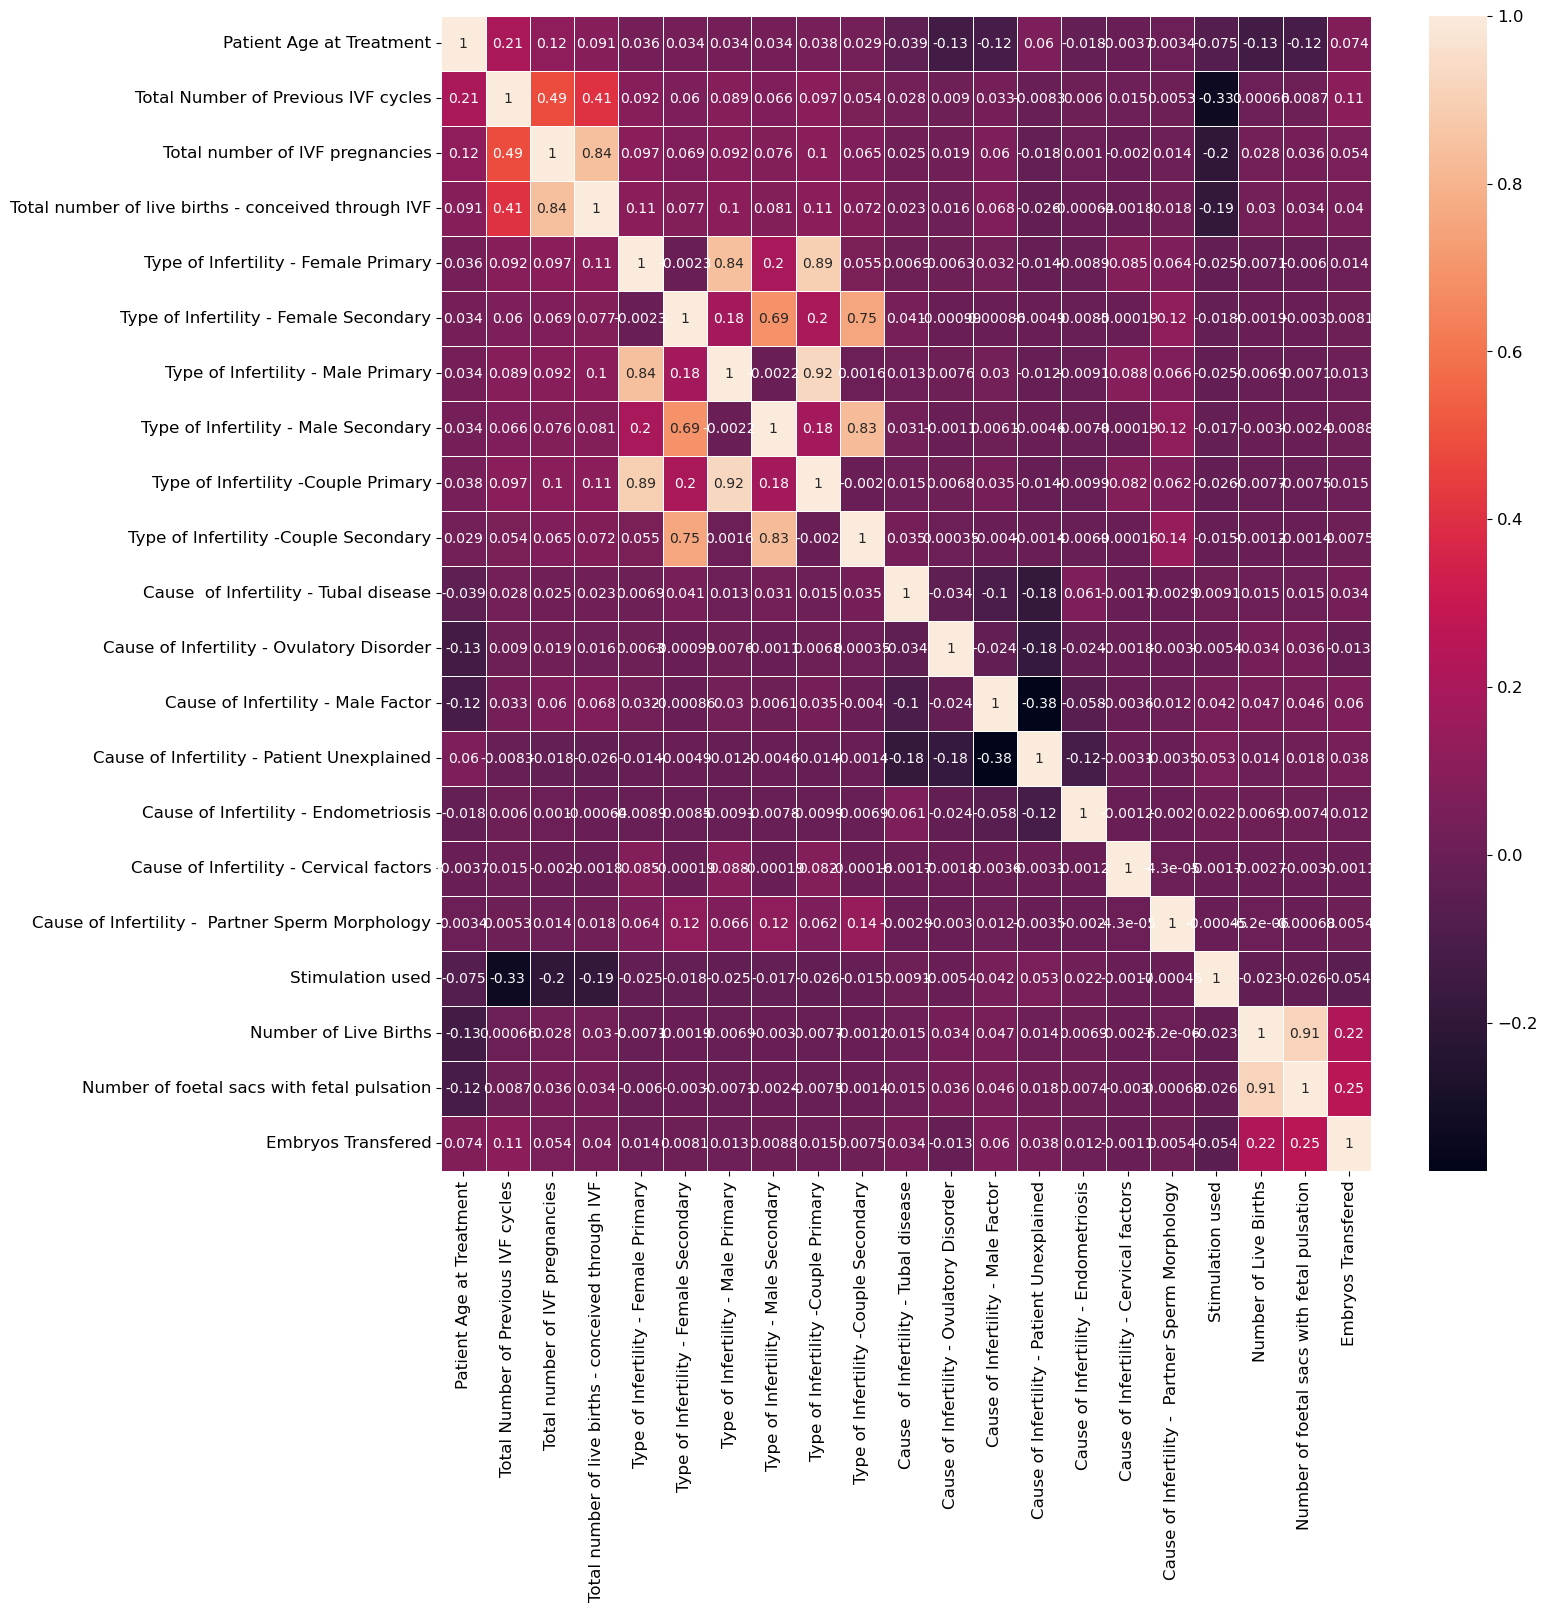

In [62]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [63]:
mod_df['Total number of live births - conceived through IVF'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
y = mod_df['Total number of live births - conceived through IVF']

In [65]:
y

0         0
1         0
2         0
3         0
4         1
         ..
158514    0
158515    0
158516    0
158517    0
158518    0
Name: Total number of live births - conceived through IVF, Length: 156025, dtype: int64

In [27]:
x = mod_df.drop('Number of Live Births', axis=1, inplace = True)
x = mod_df.drop('Total number of live births - conceived through IVF', axis=1, inplace = True)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 6]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'Partner & Donor']
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1.         2.         0.         3.         1.16425844]


In [29]:
SpermFromPartner = [] 
for s in list(mod_df['Sperm From']):
    if 'Partner' in s:
        SpermFromPartner.append(1)
    else:
        SpermFromPartner.append(0)

In [30]:
SpermFromDonor = [] 
for s in list(mod_df['Sperm From']):
    if 'Donor' in s:
        SpermFromDonor.append(1)
    else:
        SpermFromDonor.append(0)

In [31]:
len(SpermFromPartner)
len(SpermFromDonor)

156025

In [32]:
mod_df.insert(len(mod_df.columns), column = "Sperm From Partner", value = SpermFromPartner)
mod_df.insert(len(mod_df.columns), column = "Sperm From Donor", value = SpermFromDonor)
mod_df.drop('Sperm From', axis=1, inplace = True)

In [33]:
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 6]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1.         2.         0.         3.         1.16425844]
Sperm From Partner
[1 0]
Sperm From Donor
[0 1]


In [34]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mod_df, y, test_size=0.20, random_state=42)

In [35]:
train_x

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,...,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Partner Sperm Morphology,Stimulation used,Number of foetal sacs with fetal pulsation,Embryos Transfered,Sperm From Partner,Sperm From Donor
74354,26.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
15070,26.0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1.000000,1,0
10943,38.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,2.000000,1,0
19225,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.000000,1,0
43772,38.5,6,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,3.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121949,26.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1.000000,1,0
105515,26.0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
134139,41.0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.000000,1,0
149361,26.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.164258,0,1


In [36]:
test_x

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,...,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Partner Sperm Morphology,Stimulation used,Number of foetal sacs with fetal pulsation,Embryos Transfered,Sperm From Partner,Sperm From Donor
116015,36.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0.000000,1,0
48003,36.0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,2.000000,1,0
82318,38.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,2.000000,1,0
67612,41.0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1.000000,1,0
31467,36.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151092,26.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.164258,0,1
14783,26.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0.000000,1,0
1758,38.5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2.000000,1,0
154819,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.164258,0,1


In [37]:
test_y

116015    0
48003     0
82318     0
67612     0
31467     0
         ..
151092    0
14783     1
1758      0
154819    0
71097     0
Name: Total number of live births - conceived through IVF, Length: 31205, dtype: int64

In [38]:
train_x.to_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_x.csv', index=False)
train_y.to_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_y.csv', index=False)
test_x.to_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_binary_x.csv', index=False)
test_y.to_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_binary_y.csv', index=False)

In [41]:
train_x_tmp = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_x.csv')
train_x_tmp

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,...,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Partner Sperm Morphology,Stimulation used,Number of foetal sacs with fetal pulsation,Embryos Transfered,Sperm From Partner,Sperm From Donor
0,26.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
1,26.0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1.000000,1,0
2,38.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,2.000000,1,0
3,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.000000,1,0
4,38.5,6,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,3.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124815,26.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1.000000,1,0
124816,26.0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
124817,41.0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.000000,1,0
124818,26.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.164258,0,1


In [42]:
train_y_tmp = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_y.csv')
train_y_tmp

,Total number of live births - conceived through IVF
0,0
1,0
2,0
3,0
4,1
...,...
124815,0
124816,1
124817,0
124818,0


In [44]:
set(train_y_tmp['Total number of live births - conceived through IVF'])

{0, 1}